In [1]:
#pip install pandas

In [2]:
#pip install matplotlib

In [3]:
#pip install openpyxl

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('/Users/dezmon/Documents/GitHub/Uptown_Streamlit/Items_Sold_Export_Uptown_Cheapskate_Charlotte_20241007.xlsx', 
                   usecols=['Sold Date','Invoice No', 'Sold Cost Total','Sold Price Total','Sub Category','Days on Hand',
                            'Transaction Type','Employee Role','Employee_First'])
df.head()

,Sub Category,Sold Date,Days on Hand,Sold Cost Total,Sold Price Total,Invoice No,Transaction Type,Employee_First,Employee Role
0,Lshirt,2024-10-07 12:55:09.462,18,3.22,14.99,3C0459712,Shop,ELIZABETH,Buyer
1,NaN,2024-10-07 12:34:15.967,19,3.30,8.09,3C0459711,Shop,ASTRID,Sales Associate
2,Leather,2024-10-07 12:34:15.967,6,4.07,14.39,3C0459711,Shop,ASTRID,Sales Associate
3,Basic T,2024-10-07 12:34:15.967,5,2.50,8.99,3C0459711,Shop,ASTRID,Sales Associate
4,Casual,2024-10-07 12:34:15.967,15,3.50,12.59,3C0459711,Shop,ASTRID,Sales Associate


In [6]:
df.dtypes

Sub Category                object
Sold Date           datetime64[ns]
Days on Hand                 int64
Sold Cost Total            float64
Sold Price Total           float64
Invoice No                  object
Transaction Type            object
Employee_First              object
Employee Role               object
dtype: object

In [7]:
# Extract only the date
#df['Sold Date'] = df['Sold Date'].dt.date
df.head()

,Sub Category,Sold Date,Days on Hand,Sold Cost Total,Sold Price Total,Invoice No,Transaction Type,Employee_First,Employee Role
0,Lshirt,2024-10-07 12:55:09.462,18,3.22,14.99,3C0459712,Shop,ELIZABETH,Buyer
1,NaN,2024-10-07 12:34:15.967,19,3.30,8.09,3C0459711,Shop,ASTRID,Sales Associate
2,Leather,2024-10-07 12:34:15.967,6,4.07,14.39,3C0459711,Shop,ASTRID,Sales Associate
3,Basic T,2024-10-07 12:34:15.967,5,2.50,8.99,3C0459711,Shop,ASTRID,Sales Associate
4,Casual,2024-10-07 12:34:15.967,15,3.50,12.59,3C0459711,Shop,ASTRID,Sales Associate


In [8]:
# Creating Profit Varaible

df['profit'] = df['Sold Price Total'] - df['Sold Cost Total'] 



In [9]:
# Group by 'Date' and sum the sales for each day
# Extract date for line plot
df['Date'] = df['Sold Date'].dt.date
daily_sales = df.groupby('Date')['profit'].sum().reset_index()

## Monthly Sales Overview

Using Matplotlib

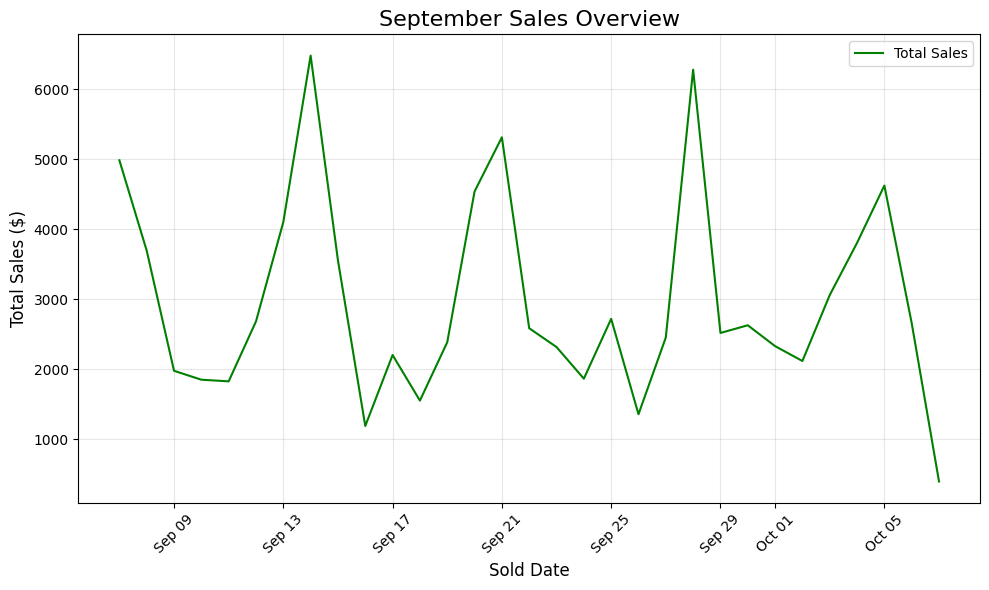

In [10]:
from matplotlib.dates import DateFormatter
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['profit'], linestyle='-', color='g', label='Total Sales')

# Customize the x-axis to display the date in "Nov 2" format
date_formatter = DateFormatter('%b %d')  # Format as "Nov 2"
plt.gca().xaxis.set_major_formatter(date_formatter)

# Adding labels and title
plt.title('September Sales Overview', fontsize=16)
plt.xlabel('Sold Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend and adjust layout
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Using Plotly


In [14]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 32.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install nbformat --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
Note: you may need to restart the kernel to use updated packages.


In [16]:
import plotly.express as px

# Assuming your data is in a pandas DataFrame called daily_sales
fig = px.line(daily_sales, x='Date', y='profit', title='Total Daily Sales Over November 2024')

# Highlight peak sales (for example, let's say peak sales occurred on Nov 5th)
fig.add_annotation(
    x='2024-09-14', y=7000,  # Peak sales date and value
    text="Peak Sales", 
    showarrow=True, 
    arrowhead=2, 
    ax=0, 
    ay=-40
)
fig.add_annotation(
    x='2024-09-28', y=7000,  # Peak sales date and value
    text="Peak Sales", 
    showarrow=True, 
    arrowhead=2, 
    ax=0, 
    ay=-40
)

# Customize the layout
fig.update_layout(
    xaxis_title="Sold Date",
    yaxis_title="Total Sales ($)"
)

# Show the plot
fig.show()


### Hourly Sales Performance Heatmap

In [17]:
df['Sold Date']

0      2024-10-07 12:55:09.462
1      2024-10-07 12:34:15.967
2      2024-10-07 12:34:15.967
3      2024-10-07 12:34:15.967
4      2024-10-07 12:34:15.967
                 ...          
7820   2024-09-07 10:24:00.288
7821   2024-09-07 10:24:00.288
7822   2024-09-07 10:20:56.578
7823   2024-09-07 10:12:44.344
7824   2024-09-07 10:12:44.344
Name: Sold Date, Length: 7825, dtype: datetime64[ns]

In [22]:
# Extract date for line plot
df['Date'] = df['Sold Date'].dt.date

# Extract hour and weekday for heatmap
df['Hour'] = df['Sold Date'].dt.hour
df['Weekday'] = df['Sold Date'].dt.day_name()  # e.g., "Monday", "Tuesday"

# Format hour to show 12-hour format with am/pm
def format_hour(hour):
    if hour == 0:
        return "12am"
    elif hour == 12:
        return "12pm"
    elif hour > 12:
        return f"{hour - 12}pm"
    else:
        return f"{hour}am"
    
df['Formatted Hour'] = df['Hour'].apply(format_hour)
# Create a pivot table for heatmap data
heatmap_data = df.groupby(['Weekday', 'Formatted Hour']).size().reset_index(name='Count')

# Pivot to create matrix-like format for heatmap
heatmap_pivot = heatmap_data.pivot(index='Weekday', columns='Formatted Hour', values='Count').fillna(0)

# Reorder days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot.reindex(ordered_days)

# Line plot for sales over time
line_fig = px.line(df, x='Date', y='profit', title="Daily Sales Over Time")

# Heatmap for sales by hour and weekday
heatmap_fig = px.imshow(
    heatmap_pivot,
    labels={'x': 'Hour of Day', 'y': 'Weekday', 'color': 'Count'},
    x=heatmap_pivot.columns,
    y=heatmap_pivot.index,
    title="Sales Count by Hour and Weekday",
    color_continuous_scale='Greens'
)

In [23]:
# Show the heatmap
heatmap_fig.show()

### Employee Sales Performance Bar Chart

In [20]:
# Calculate distinct invoices per employee
employee_invoices = df.groupby('Employee_First')['Invoice No'].nunique().reset_index()
employee_invoices.columns = ['Employee', 'Distinct Invoices']
# Sort by distinct invoices in descending order
employee_invoices = employee_invoices.sort_values(by='Distinct Invoices', ascending=False)

# Create a bar chart
fig = px.bar(
    employee_invoices,
    x='Employee',
    y='Distinct Invoices',
    title='Total Number of Distinct Invoices per Employee',
    labels={'Distinct Invoices': 'Number of Invoices', 'Employee': 'Employee Name'},
    text='Distinct Invoices'
)

# Add bar chart customizations
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Employee', yaxis_title='Number of Distinct Invoices')

# Show the chart
fig.show()

In [21]:
# Convert 'Sold Date' to datetime
df['Sold Date'] = pd.to_datetime(df['Sold Date'])

# Calculate distinct invoices and average invoice total per employee
employee_summary = df.groupby('Employee_First').agg(
    Distinct_Invoices=('Invoice No', 'nunique'),
    Avg_Invoice_Total=('Sold Price Total', 'mean')
).reset_index()

# Add a descriptor for the average invoice total
employee_summary['Descriptor'] = employee_summary['Avg_Invoice_Total'].apply(
    lambda x: f"Avg: ${x:.2f}"
)

# Sort by distinct invoices in descending order
employee_summary = employee_summary.sort_values(by='Distinct_Invoices', ascending=False)

# Create a bar chart
fig = px.bar(
    employee_summary,
    x='Employee_First',
    y='Distinct_Invoices',
    title='Total Number of Distinct Invoices per Employee',
    labels={'Distinct_Invoices': 'Number of Invoices', 'Employee_First': 'Employee Name'},
    text='Descriptor'  # Add the descriptor as text on bars
)

# Add bar chart customizations
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Employee', yaxis_title='Number of Distinct Invoices')

# Show the chart
fig.show()

### Top 10 Selling Categories (Barchart)

### Top 10 Items with Highest Days on Hand (Bar Chart)